In [1]:
# Bibliotecas
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://github.com/Gustavoohs/Posts-instagram/raw/master/Dados/MT_indices.zip
!unzip MT_indices.zip

--2023-12-12 11:22:11--  https://github.com/Gustavoohs/Posts-instagram/raw/master/Dados/MT_indices.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Gustavoohs/Posts-instagram/master/Dados/MT_indices.zip [following]
--2023-12-12 11:22:12--  https://media.githubusercontent.com/media/Gustavoohs/Posts-instagram/master/Dados/MT_indices.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3821621 (3.6M) [application/zip]
Saving to: ‘MT_indices.zip’

MT_indices.zip      100%[===================>]   3.64M  --.-KB/s    in 0.09s   

2023-12-12 11:22:12 (41.4 MB/s) - ‘MT_indices.zip’ save

In [2]:
# Lendo arquivo
gdf = gpd.read_file('MT_indices.shp' )
gdf.head()

In [ ]:
# Calcular o número de vizinhos para cada polígono
for idx, polygon in gdf.iterrows():
    neighbors = gdf[gdf.geometry.touches(polygon.geometry) | gdf.geometry.intersects(polygon.geometry)]
    num_neighbors = len(neighbors) - 1  # Devemos Excluir o próprio polígono
    gdf.at[idx, 'num_vizinhos'] = num_neighbors

<Axes: >

<Figure size 1500x1500 with 0 Axes>

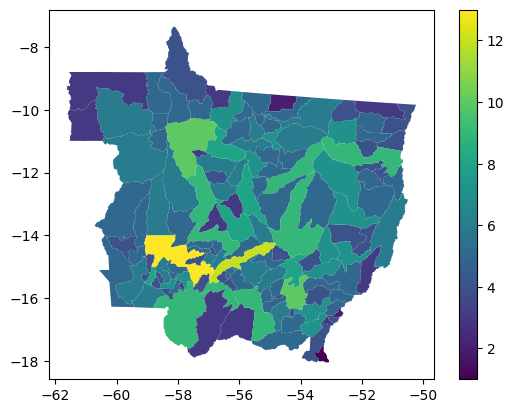

In [10]:
# Visualizando resultado
plt.figure(figsize=(15, 15))
gdf.plot(column='num_vizinhos', legend=True)

In [8]:
gdf.head()

,CD_GEOCMU,firjan_Mun,FIRJAN,IDHM,IVS,geometry,num_vizinhos
0,5100102,Acorizal,0.648,0.628,0.398,"POLYGON ((-56.20270 -14.99069, -56.20158 -14.9...",5.0
1,5100300,Alto Araguaia,0.726,0.704,0.242,"POLYGON ((-53.01380 -16.86532, -53.01380 -16.8...",4.0
2,5100409,Alto Garças,0.801,0.701,0.252,"POLYGON ((-53.21107 -16.45766, -53.21106 -16.4...",7.0
3,5100508,Alto Paraguai,0.605,0.638,0.479,"POLYGON ((-56.47631 -14.66725, -56.47580 -14.6...",6.0
4,5100607,Alto Taquari,0.840,0.705,0.201,"POLYGON ((-53.24294 -17.60182, -53.24665 -17.6...",1.0
